# Data Project - Gross unemployment

For this project we use DST API

1. Open the Anaconda prompt.
2. Run the command 'pip install git+https://github.com/alemartinello/dstapi' in the prompt.
3. For a more detailed guide on using the DST API, please refer to https://github.com/alemartinello/dstapi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dstapi import DstApi

## Defining the problem

In [2]:
# Searching for gross unemployment data through DST API
gross_unemployment_dst = DstApi('AULP01')

# Creating and displaying the a summary of the gross unemployment data
summary_gross_unemployment = gross_unemployment_dst.tablesummary(language='en')
display(summary_gross_unemployment)

Table AULP01: Full-time unemployed persons in per cent of the labour force by region, age, sex and time
Last update: 2023-04-14T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,117,000,All Denmark,997,Abroad,False
1,ALDER,10,TOT,"Age, total",6099,60 year and over,False
2,KØN,3,TOT,Total,K,Women,False
3,Tid,16,2007,2007,2022,2022,True


In [3]:
# Setting parameters
par_gross_unemployment = {
    'table': 'AULP01',
    'format': 'BULK',
    'lang': 'en',
    'variables': [
        {'code': 'OMRÅDE', 'values': ['000']}, #000 = All of Denmark
        {'code': 'ALDER', 'values': ['TOT']}, #TOT = Age, total
        {'code': 'KØN', 'values': ['TOT', 'M', 'K']}, #TOT = Total, M = Men, K = Woman
        {'code': 'Tid', 'values': ['2006<=2022']}
    ]
}

# Fetching data based parameters set (Fetching from AUS07)
gross_unemployment = gross_unemployment_dst.get_data(params=par_gross_unemployment)

# Removing the 'OMRÅDE' and 'ALDER' columns
gross_unemployment = gross_unemployment.drop(['OMRÅDE', 'ALDER'], axis=1)

# Sort the DataFrame by date
gross_unemployment = gross_unemployment.sort_values('TID')

# Renaming the columns
gross_unemployment.rename(columns=
                          {'KØN':'GENDER',
                          'TID':'YEAR',
                          'INDHOLD':'GROSS UNEMPLOYMENT RATE (%)'},
                          inplace=True
                    )

# Convert pct. into floats
gross_unemployment['GROSS UNEMPLOYMENT RATE (%)'] = pd.to_numeric(gross_unemployment['GROSS UNEMPLOYMENT RATE (%)'])

# Displaying gross unemployment table
gross_unemployment.head(6)

,GENDER,YEAR,GROSS UNEMPLOYMENT RATE (%)
0,Women,2007,4.4
1,Men,2007,2.9
2,Total,2007,3.6
3,Women,2008,2.9
4,Men,2008,2.4
5,Total,2008,2.6


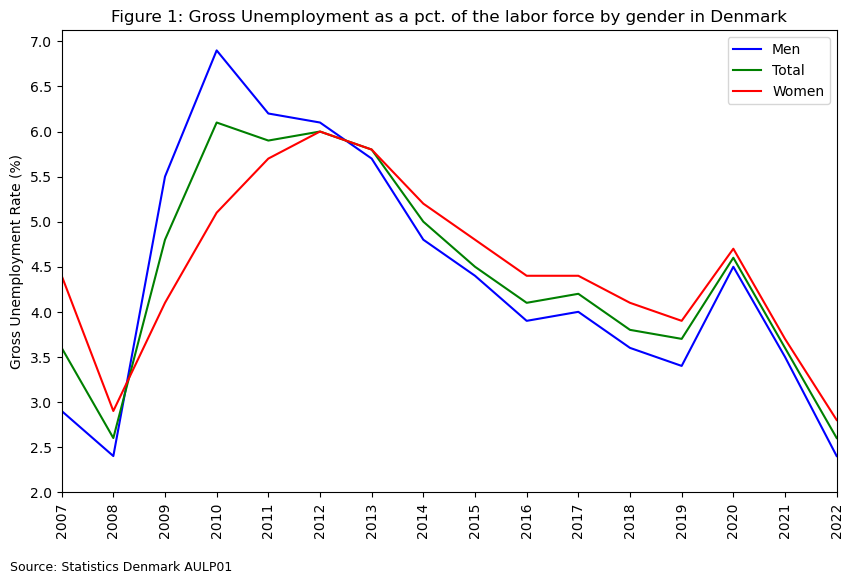

In [4]:
# Set the figure size
plt.figure(figsize=(10,6))

# Define colors for each line
colors = {'Total': 'green', 'Men': 'blue', 'Women': 'red'}

# Group the data by the 'TOTAL GROSS EMPLOYMENT AND SEX' column
grouped = gross_unemployment.groupby('GENDER')

# Loop through the grouped data and plot each group with the defined color
for name, group in grouped:
    plt.plot(group['YEAR'], group['GROSS UNEMPLOYMENT RATE (%)'], label=name, color=colors[name])

# Adding label and title
plt.ylabel('Gross Unemployment Rate (%)')
plt.title('Figure 1: Gross Unemployment as a pct. of the labor force by gender in Denmark')

# Defining ticks for x- and y-axis, and any limits
plt.xticks(rotation=90)
plt.xticks(range(2007, 2023))
plt.xlim(2007, 2022)
plt.yticks(np.arange(2, 7.5, 0.5))

# Adding text box for source
plt.text(2006, 1.125, 'Source: Statistics Denmark AULP01', fontsize=9)

# Legend, gridlines and plotting
plt.legend(loc='upper right')
plt.show()


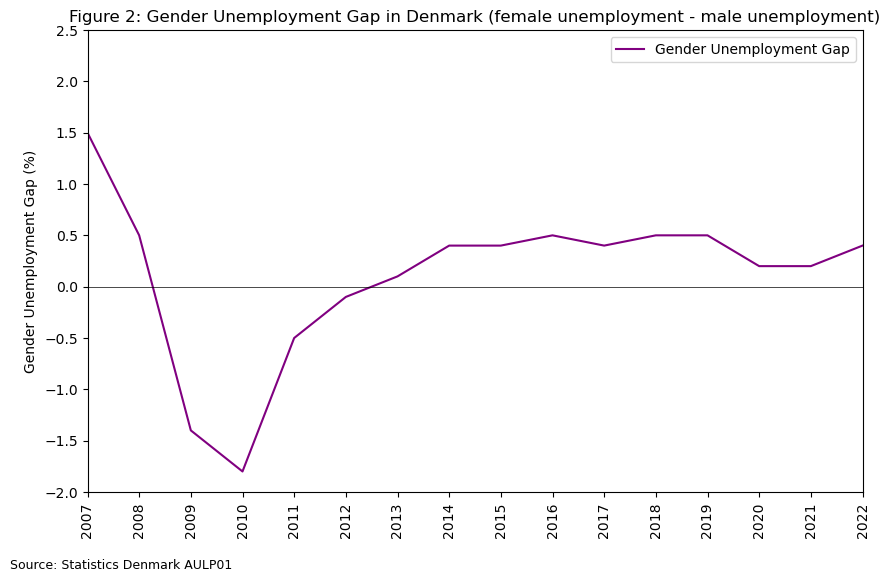

In [16]:
# Calculating difference between male and female gross unemployment rates
male_unemployment = gross_unemployment[gross_unemployment['GENDER'] == 'Men']
female_unemployment = gross_unemployment[gross_unemployment['GENDER'] == 'Women']

gender_gap = female_unemployment[['YEAR']].copy()
gender_gap['GENDER UNEMPLOYMENT GAP (%)'] = female_unemployment['GROSS UNEMPLOYMENT RATE (%)'].values - male_unemployment['GROSS UNEMPLOYMENT RATE (%)'].values

# Setting figure size
plt.figure(figsize=(10, 6))
plt.plot(gender_gap['YEAR'], gender_gap['GENDER UNEMPLOYMENT GAP (%)'], label='Gender Unemployment Gap', color='purple')

# Adding label and title
plt.ylabel('Gender Unemployment Gap (%)')
plt.title('Figure 2: Gender Unemployment Gap in Denmark (female unemployment - male unemployment)')

# Defining ticks for x- and y-axis, and any limits
plt.xticks(rotation=90)
plt.xticks(range(2007, 2023))
plt.xlim(2007, 2022)
plt.yticks(np.arange(-2, 3, 0.5))

# Adding horizontal line for y=0
plt.axhline(y=0, color='black', linewidth=0.5)

# Adding text box for source
plt.text(2005.5, -2.75, 'Source: Statistics Denmark AULP01', fontsize=9)

# Legend, gridlines, and plotting
plt.legend(loc='upper right')
plt.show()

## Analysis

In [5]:
# Searching for GDP data through DST API
GDP_dst = DstApi('NAN1')

# Creating and displaying the a summary of the GDP data
summary_GDP_dst = GDP_dst.tablesummary(language='en')
display(summary_GDP_dst)

Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2023-03-31T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,31,B1GQK,B.1*g Gross domestic product,EMPM_DC,"Total employment (1,000 persons)",False
1,PRISENHED,6,V_M,"Current prices, (bill. DKK.)",LAN_C,"Pr. capita, 2010-prices, chained values, (1000...",False
2,Tid,57,1966,1966,2022,2022,True


In [6]:
# Setting parameters
par_GDP = {
    'table': 'NAN1',
    'format': 'BULK',
    'lang': 'en',
    'variables': [
        {'code': 'TRANSAKT', 'values': ['B1GQK']}, # B1GQK
        {'code': 'PRISENHED', 'values': ['L_V']}, #L_V = Period-to-period real growth (pct.)
        {'code': 'Tid', 'values': ['>2006<=2022']}
    ]
}

# Fetching data based parameters set (Fetching from NAN1)
GDP = GDP_dst.get_data(params=par_GDP)

# Removing the 'TRANSAKT' and 'PRISENHED' columns
GDP = GDP.drop(['TRANSAKT', 'PRISENHED'], axis=1)

# Renaming the columns
GDP.rename(columns=
                {'TID':'YEAR',
                'INDHOLD':'REAL GROWTH IN GDP (%)'},
                inplace=True
            )

# Convert pct. into floats
GDP['REAL GROWTH IN GDP (%)'] = pd.to_numeric(GDP['REAL GROWTH IN GDP (%)'])

# Sort the DataFrame by date
GDP = GDP.sort_values('YEAR')

# Extracting the total gross unemployment from our previously fetched data from AUS07
total_gross_unemployment = gross_unemployment[gross_unemployment['GENDER'] == 'Total']

# Displaying GDP tabel
GDP.head(5)

,YEAR,REAL GROWTH IN GDP (%)
0,2007,0.9
1,2008,-0.5
2,2009,-4.9
3,2010,1.9
4,2011,1.3


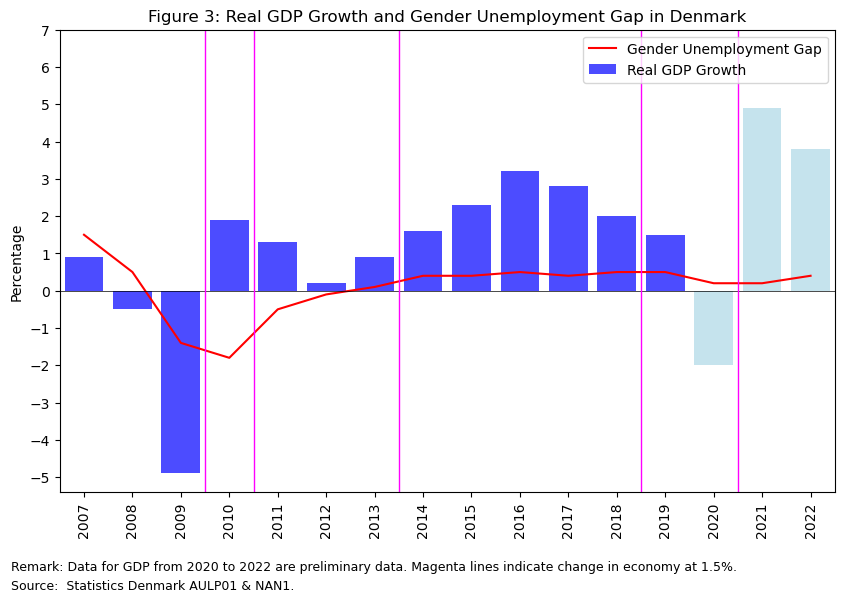

In [26]:
# Set the figure size
plt.figure(figsize=(10,6))

# Plot the gender unemployment gap as a line
plt.plot(gender_gap['YEAR'],
         gender_gap['GENDER UNEMPLOYMENT GAP (%)'],
         color='red', label='Gender Unemployment Gap')

# Creating a list of colors for each bar
colors = ['blue'] * (len(GDP)-3) + ['lightblue'] * 3

# Creating a bar plot of the GDP growth with different colors for the last 3 bars
plt.bar(GDP['YEAR'], GDP['REAL GROWTH IN GDP (%)'], color=colors, alpha=0.7, label='Real GDP Growth')

# Adding title and labels
plt.title('Figure 3: Real GDP Growth and Gender Unemployment Gap in Denmark')
plt.ylabel('Percentage')

# Defining ticks for x- and y-axis
plt.xticks(rotation=90)
plt.xticks(range(2007, 2023))
plt.xlim(2006.5, 2022.5)
plt.yticks(np.arange(-5, 8, 1))

# Adding a horizontal line at y=0
plt.axhline(y=0, color='black', linewidth=0.5)

# Adding vertical lines to show change in economy, when GDP growth is above or under 1.5%
for i in range(1, len(GDP)):
    if GDP['REAL GROWTH IN GDP (%)'][i] > 1.5 and GDP['REAL GROWTH IN GDP (%)'][i-1] <= 1.5:
        plt.axvline(x=GDP['YEAR'][i-1] + 0.5, color='magenta', linewidth=1)
    elif GDP['REAL GROWTH IN GDP (%)'][i] <= 1.5 and GDP['REAL GROWTH IN GDP (%)'][i-1] > 1.5:
        plt.axvline(x=GDP['YEAR'][i-1] + 0.5, color='magenta', linewidth=1)

# Adding text boxes for remarks and source
plt.text(2005.5, -7.5, 'Remark: Data for GDP from 2020 to 2022 are preliminary data. Magenta lines indicate change in economy at 1.5%.', fontsize=9)
plt.text(2005.5, -8, 'Source:  Statistics Denmark AULP01 & NAN1.',fontsize=9)

# Adding a legend and plotting
plt.legend(loc='upper right')
plt.show()
